In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/'

In [0]:
df=pd.read_csv(url)
df['dateRep'] = df['dateRep'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
df.index = df['dateRep']
df.sort_index(inplace=True)
df_India = df[df['geoId'] == 'IN'].copy()
df_USA = df[df['geoId'] == 'US'].copy()

In [0]:
df_India.index = df_India['dateRep']
df_India.sort_index(inplace=True)
df_USA.index = df_USA['dateRep']
df_USA.sort_index(inplace=True)

In [0]:
df_India['cummulative_case'] = df_India['cases'].cumsum(axis=0)
df_India.loc[:, 'cummulative_deaths'] = df_India.loc[:, 'deaths'].cumsum(axis=0)

df_USA.loc[:, 'cummulative_case'] = df_USA.loc[:,'cases'].cumsum(axis=0)
df_USA.loc[:, 'cummulative_deaths'] = df_USA.loc[:, 'deaths'].cumsum(axis=0)

In [0]:
# weekly_resampled_data_case = df_India.cases.resample('W').sum()
# weekly_resampled_data_deaths = df_India.deaths.resample('W').sum()
# print(weekly_resampled_data_case.shape)
# print(weekly_resampled_data_deaths.shape)

(17,)
(17,)


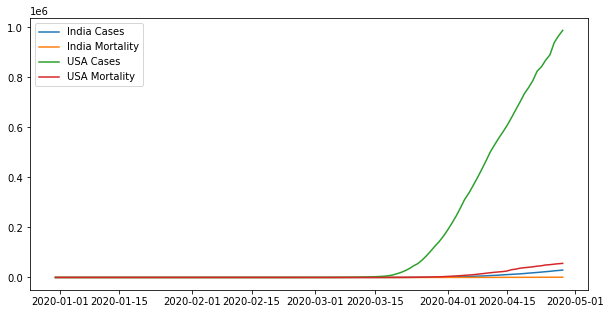

In [0]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(df_India['cummulative_case'], label='India Cases')
plt.plot(df_India['cummulative_deaths'], label='India Mortality')
plt.plot(df_USA['cummulative_case'], label='USA Cases')
plt.plot(df_USA['cummulative_deaths'], label='USA Mortality')
plt.legend()
plt.xticks()
plt.show()

In [0]:
df_India['Mortality_Rate'] = df_India['cummulative_deaths']/df_India['cummulative_case']
df_India['Mortality_Rate'] = df_India['Mortality_Rate'].fillna(0)

df_USA['Mortality_Rate'] = df_USA['cummulative_deaths']/df_USA['cummulative_case']
df_USA['Mortality_Rate'] = df_USA['Mortality_Rate'].fillna(0)

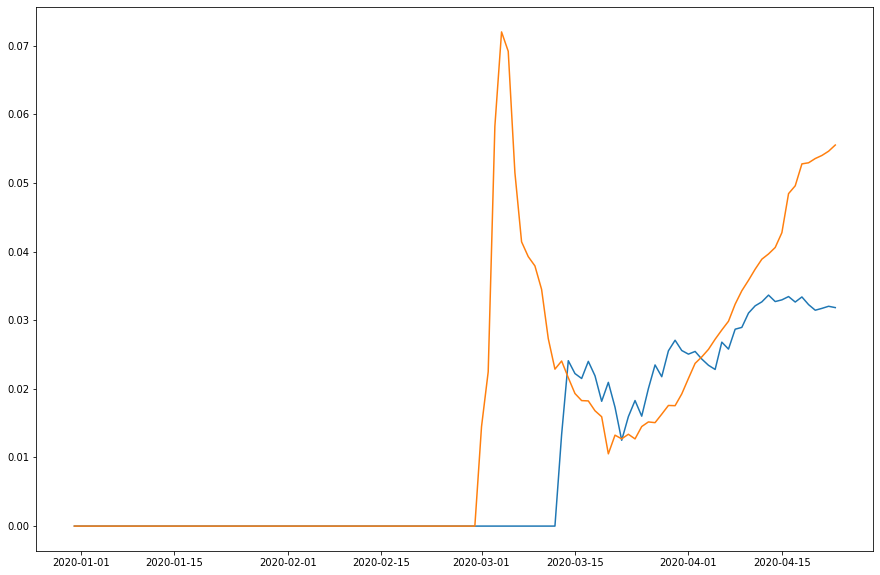

In [0]:
plt.figure(figsize=(10,5))
plt.plot(df_India['Mortality_Rate'], label='India')
plt.plot(df_USA['Mortality_Rate'], label='USA')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

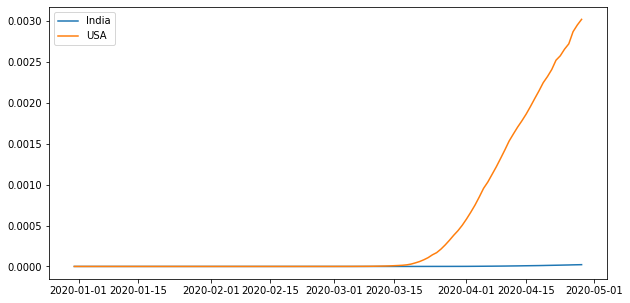

In [0]:
df_India['Cases_perpop'] = df_India['cummulative_case']/df_India['popData2018']
df_USA['Cases_perpop'] = df_USA['cummulative_case']/df_USA['popData2018']
# df_India['Cases_perpop'] = df_India['Cases_perpop'].fillna(0)
plt.figure(figsize=(10,5))
plt.plot(df_India['Cases_perpop'], label='India')
plt.plot(df_USA['Cases_perpop'], label='USA')
plt.legend()
plt.show

In [0]:
most_affected = []
deaths_percent = df.groupby('geoId').sum()['deaths'] / df.groupby('geoId').sum()['popData2018']
case_percent = df.groupby('geoId').sum()['cases'] / df.groupby('geoId').sum()['popData2018']
deaths_percent = pd.DataFrame(deaths_percent.reset_index())
case_percent = pd.DataFrame(case_percent.reset_index())
deaths_percent.columns = ['geoId', 'Death_Percent']
case_percent.columns = ['geoId-2', 'Case_Percent']
df_percent = pd.concat([deaths_percent, case_percent], axis=1)
df_percent.drop(labels=['geoId-2'],axis=1, inplace=True)
low_death_rate = list(df_percent['Death_Percent'].nsmallest(10).index.values)
for i in df_percent.loc[low_death_rate,'geoId'].values:
    country = df.loc[df['geoId'] == i, ['countriesAndTerritories']].values[0]
    print(country[0])
    most_affected.append(country[0])

Bhutan
Central_African_Republic
Dominica
Fiji
Faroe_Islands
Grenada
Greenland
Guinea_Bissau
Cambodia
Saint_Kitts_and_Nevis


In [0]:
most_affected[1:]

['Andorra',
 'San_Marino',
 'Sint_Maarten',
 'Isle_of_Man',
 'Jersey',
 'Belgium',
 'Guernsey',
 'Spain',
 'Italy']

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filt = (df['continentExp'] == 'America')
df_america = df.loc[filt, ['cases', 'deaths', 'countriesAndTerritories', 'popData2018']].copy()
df_america.head()

,cases,deaths,countriesAndTerritories,popData2018
dateRep,,,,
2019-12-31,0,0,Dominican_Republic,10627165.0
2019-12-31,0,0,Ecuador,17084357.0
2019-12-31,0,0,Canada,37058856.0
2019-12-31,0,0,Mexico,126190788.0
2019-12-31,0,0,United_States_of_America,327167434.0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inpu

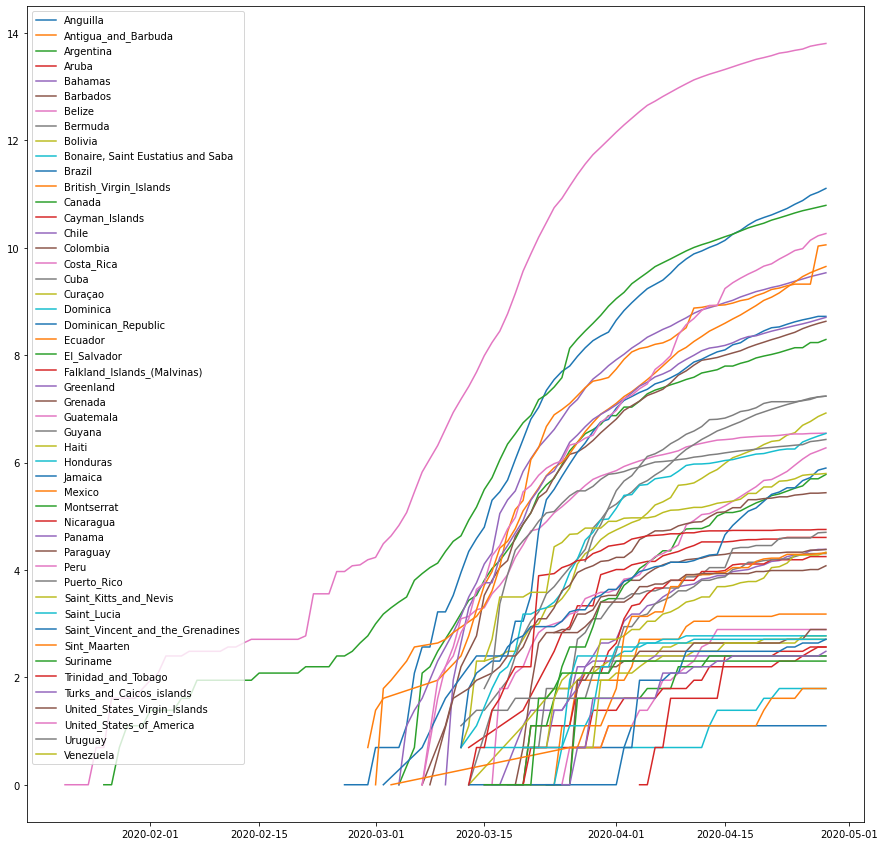

In [0]:
import math
plt.figure(figsize=(15,15))
for v,d in df_america.groupby(['countriesAndTerritories']):
    d = d.copy()
    d.loc[:, 'Cummulative'] = d.loc[:, 'cases'].cumsum(axis=0)
    d.loc[:,'Cummulative'] = np.log(d.loc[:,'Cummulative'])
    plt.plot(d.index, d['Cummulative'] , label=v)
    plt.legend()

plt.show()

In [0]:
sum_case = df.groupby(['continentExp','countriesAndTerritories']).sum()['cases'].copy()
sum_case.groupby(['continentExp']).nlargest(5).index.values

array([('Africa', 'Africa', 'South_Africa'),
       ('Africa', 'Africa', 'Egypt'), ('Africa', 'Africa', 'Morocco'),
       ('Africa', 'Africa', 'Algeria'), ('Africa', 'Africa', 'Cameroon'),
       ('America', 'America', 'United_States_of_America'),
       ('America', 'America', 'Brazil'), ('America', 'America', 'Canada'),
       ('America', 'America', 'Peru'), ('America', 'America', 'Ecuador'),
       ('Asia', 'Asia', 'Turkey'), ('Asia', 'Asia', 'Iran'),
       ('Asia', 'Asia', 'China'), ('Asia', 'Asia', 'India'),
       ('Asia', 'Asia', 'Saudi_Arabia'), ('Europe', 'Europe', 'Spain'),
       ('Europe', 'Europe', 'Italy'),
       ('Europe', 'Europe', 'United_Kingdom'),
       ('Europe', 'Europe', 'Germany'), ('Europe', 'Europe', 'France'),
       ('Oceania', 'Oceania', 'Australia'),
       ('Oceania', 'Oceania', 'New_Zealand'),
       ('Oceania', 'Oceania', 'Guam'),
       ('Oceania', 'Oceania', 'French_Polynesia'),
       ('Oceania', 'Oceania', 'Fiji'),
       ('Other', 'Other', 'Cases